In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from statsmodels.tsa.stattools import grangercausalitytests

## How are CO2 emissions related to climate change?

Everyday, we hear people talking about **Climate Change** and **CO2 emissions**: frequently politicians avoid the topic in order not to loose vote, while citizens strike for that.

We are Data Scientist, and we don't trust both: therefore, we would like to check the causality (or better correlation) between this two phenomena with our hands (and our computers, of course).

From the FAO dataset we took all necessary data about Climate Change. However, there were no data about total CO2 emissions: it only contains data related to crops and live stocks production activities. Since these partial data are clearly not sufficient to determine the relation we would like to inspect (also because those are only a small part of total global emissions), we retrieve additional data from *The World Bank* website ([here](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC))

This dataset contains information about the total amount of CO2 emissions per capita in different years.

In [46]:
# Load dataset
emissions_per_capita = pd.read_excel('datasets/Emissions_Per_Capita.xls')

In [47]:
# Clean data
emissions_per_capita = emissions_per_capita.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
emissions_per_capita = emissions_per_capita.rename(columns={'Country Name':'Area'})
emissions_per_capita = emissions_per_capita.set_index('Area')

In [48]:
# Clean dataset
emissions_per_capita = pd.DataFrame(emissions_per_capita.stack()).reset_index()
emissions_per_capita = emissions_per_capita.rename(columns={'level_1': 'Year', 0: 'CO2 Emissions'})
emissions_per_capita.Year = emissions_per_capita.Year.astype('int')
emissions_per_capita = emissions_per_capita.set_index('Year')
emissions_per_capita = emissions_per_capita[emissions_per_capita.Area=='World']
emissions_per_capita = emissions_per_capita.drop('Area',axis=1).loc[1961:2014]

In [49]:
emissions_per_capita.head()

,CO2 Emissions
Year,
1961,3.070018
1962,3.140957
1963,3.245109
1964,3.361380
1965,3.440053


As mentioned before, from FAO dataset we managed to get all the data related to Climate Change. As this phenomenon is not strictly related to specific countrires, but influences the entire planet, we decided to use data related to the whole world.

In [50]:
# Load dataset
world = pd.read_csv('datasets/Climate_Change_World.csv')

In [51]:
# Clean dataset
world = world[['Year Code','Value']]
world = world.rename(columns={'Year Code':'Year'})
world = world.set_index('Year')
world.columns = ['Temperature Change']
world = world.loc[1961:2014]

In [52]:
world.head()

,Temperature Change
Year,
1961,0.230
1962,0.055
1963,0.165
1964,-0.252
1965,-0.215


We now build a unique dataframe to collect both time series.

In [55]:
# Create dataframe
df = pd.DataFrame(world['Temperature Change'])
df['CO2 Emissions'] = emissions_per_capita['CO2 Emissions']

From the plot below, we can easily notice how both lines slightly grew in the last 50 years: however this is just an intuition, and is clearly not enough to prove that emissions cause or are even related to climate change.

Text(0, 0.5, '°C above baseline / CO2 tonnes per capita')

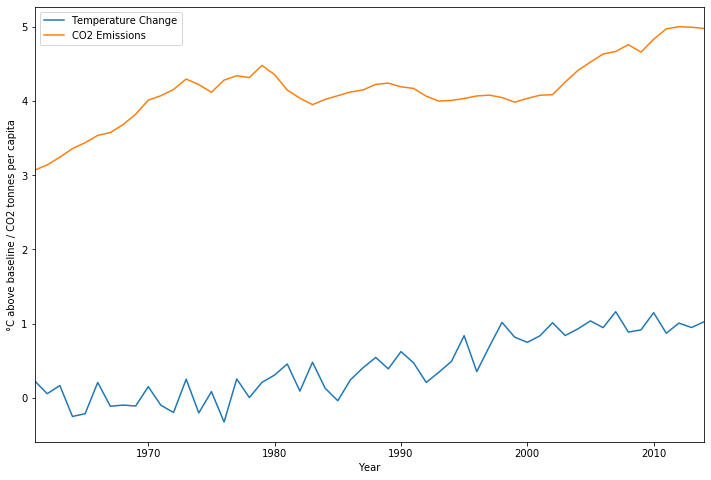

In [56]:
# Plot
fig, ax = plt.subplots(figsize=(12,8))
df.plot(ax=ax)
ax.set_ylabel('°C above baseline / CO2 tonnes per capita')

In order to analyze a possible **Causuality**, we are going to use [**Granger Casuality test**](http://www.scholarpedia.org/article/Granger_causality)

Granger causality is a way to investigate causality between two time series. It is an hypotesis test in which the
null hypothesis is that $TimeSeries_{1}$ do not explain the variation in $TimeSeries_{2}$.

In our cause $TimeSeries_{1}$ is the times serie about *CO2 Emissions* and  $TimeSeries_{2}$ is the one about *Temperature Change*.

We use the library `statsmodels` to perform the test: outputs are the p-values of four different tests. The functions also repeats the test for several lags, so we are able to know if there is casuality or not among time series in different time ranges.
For example Climate Change related to this year could be connected to the emission of the last year but not to emissions of three years ago.

In this test, we deciced to reject the null hypotesis if all the p-values from the different tests are less or equal than $\alpha$, with $\alpha$ = 0.05.

In [57]:
grangercausalitytests(df.values,maxlag=8).keys


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7996  , p=0.0332  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=5.0876  , p=0.0241  , df=1
likelihood ratio test: chi2=4.8580  , p=0.0275  , df=1
parameter F test:         F=4.7996  , p=0.0332  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1294  , p=0.3318  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=2.4992  , p=0.2866  , df=2
likelihood ratio test: chi2=2.4410  , p=0.2951  , df=2
parameter F test:         F=1.1294  , p=0.3318  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7650  , p=0.5198  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=2.6602  , p=0.4470  , df=3
likelihood ratio test: chi2=2.5932  , p=0.4587  , df=3
parameter F test:         F=0.7650  , p=0.5198  , df_denom=44, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4390  , p=0.7797  , df_d

<function dict.keys>

From the test results displayed above, we can see how CO2 emissions have a relation of causuality with **Climate Change**, but only after some years, so that the emission of this year are important for Climate Change in five years from now. In particular, the output of the tests tell us that the **causuality appears after 5 years**.

This test has its limitations, and obviously it cannot really detect causality, which is a far more complex phenomenon and does not involve temporal consequence only (the famous *hoc, ergo propter hoc* fallacy). However, it could be seen as a first clue about possible relations in the data (and not only in scientific studies) between CO2 emissions and temperature increases in recent years.